# Problem Statement
##### Ninjacart is India's largest fresh produce supply chain company. They are pioneers in solving one of the toughest supply chain problems of the world by leveraging innovative technology. They source fresh produce from farmers and deliver them to businesses within 12 hours. An integral component of their automation process is the development of robust classifiers which can distinguish between images of different types of vegetables, while also correctly labeling images that do not contain any one type of vegetable as noise.

# Loading Dataset

In [ ]:
!gdown 1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT

Downloading...

From (original): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT

From (redirected): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT&confirm=t&uuid=3e8aa88f-cc6b-4eb6-89f7-41407ad527c6

To: /content/ninjacart_data.zip

100% 275M/275M [00:03<00:00, 72.8MB/s]


# Lets unzip the data folders.

In [ ]:
!unzip ninjacart_data.zip -d /content/ninjacart_data

Archive:  ninjacart_data.zip

   creating: /content/ninjacart_data/ninjacart_data/test/

   creating: /content/ninjacart_data/ninjacart_data/test/indian market/

  inflating: /content/ninjacart_data/ninjacart_data/test/indian market/bhl.jpeg  

  inflating: /content/ninjacart_data/ninjacart_data/test/indian market/bhv.jpeg  

  inflating: /content/ninjacart_data/ninjacart_data/test/indian market/bn.jpeg  

  inflating: /content/ninjacart_data/ninjacart_data/test/indian market/hjx.jpeg  

  inflating: /content/ninjacart_data/ninjacart_data/test/indian market/igis.jpeg  

  inflating: /content/ninjacart_data/ninjacart_data/test/indian market/in.jpeg  

  inflating: /content/ninjacart_data/ninjacart_data/test/indian market/india-4898453__340.jpg  

  inflating: /content/ninjacart_data/ninjacart_data/test/indian market/indianmarket10.jpeg  

  inflating: /content/ninjacart_data/ninjacart_data/test/indian market/indianmarket12.jpeg  

  inflating: /content/ninjacart_data/ninjacart_data/test

# Installing Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os, warnings, pathlib, glob, random
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf
from tensorflow import keras # this allows <keras.> instead of <tf.keras.>
from tensorflow.keras import layers # this allows <layers.> instead of <tf.keras.layers.>
tf.keras.utils.set_random_seed(111) # set random seed

import sklearn.metrics as metrics

In [ ]:
def load_data(base_dir="/content/ninjacart_data/ninjacart_data"):
    # checking if the data folders are present
    assert os.path.exists(f"{base_dir}/train") and os.path.exists(f"{base_dir}/test")

    print('\nLoading Data...')
    train_data = tf.keras.utils.image_dataset_from_directory(
        f"{base_dir}/train", shuffle=True, label_mode='categorical'
    )

    test_data = tf.keras.utils.image_dataset_from_directory(
        f"{base_dir}/test", shuffle=False, label_mode='categorical'
    )
    return train_data, test_data, train_data.class_names

In [ ]:
train_data, test_data, classnames = load_data()



Loading Data...

Found 3135 files belonging to 4 classes.

Found 351 files belonging to 4 classes.


In [ ]:
def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))

In [ ]:
print("Counts of items in each training class.")
count_files(os.path.join(os.path.join("/content/ninjacart_data/ninjacart_data/train")))

Counts of items in each training class.

There are 789 files in tomato

There are 898 files in potato

There are 599 files in indian market

There are 849 files in onion


In [ ]:
print("Counts of items in each test class.")
count_files(os.path.join(os.path.join("/content/ninjacart_data/ninjacart_data/test")))

Counts of items in each test class.

There are 106 files in tomato

There are 81 files in potato

There are 81 files in indian market

There are 83 files in onion


In [ ]:
class_dirs = os.listdir("/content/ninjacart_data/ninjacart_data/train") # list all directories inside "train" folder
image_dict = {} # dict to store image array(key) for every class(value)
count_dict = {} # dict to store count of files(key) for every class(value)
# iterate over all class_dirs
for cls in class_dirs:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'/content/ninjacart_data/ninjacart_data/train/{cls}/*')
    # count number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # select random item from list of image paths
    image_path = random.choice(file_paths)
    # load image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)

tomato

potato

indian market

onion


In [ ]:
image_dict

{'tomato': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=400x500>,
 'potato': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=259x194>,
 'indian market': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=275x183>,
 'onion': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=610x406>}

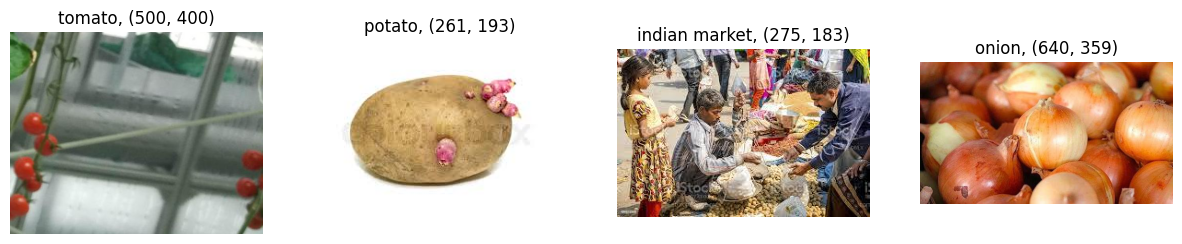

In [ ]:
## Viz Random Sample from each class

plt.figure(figsize=(15, 12))
# iterate over dictionary items (class label, image array)
for i, (cls,img) in enumerate(image_dict.items()):
    # create a subplot axis
    ax = plt.subplot(3, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set "class name" along with "image size" as title
    plt.title(f'{cls}, {img.size}')
    plt.axis("off")

Count of training samples per class:

            class  count

0         tomato    789

1         potato    898

2  indian market    599

3          onion    849


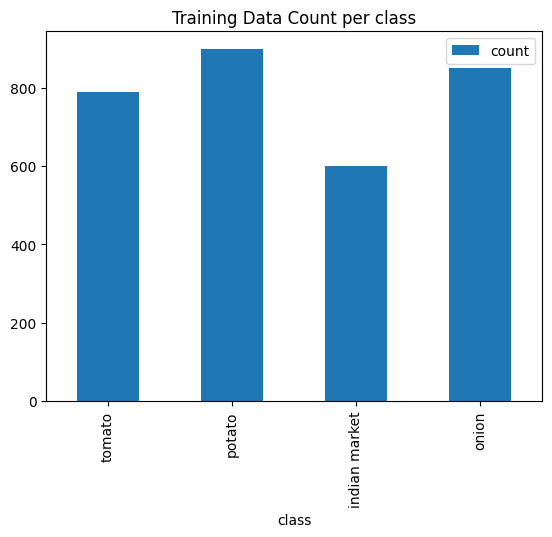

In [ ]:
## Let's now Plot the Data Distribution of Training Data across Classes
df_count_train = pd.DataFrame({
    "class": count_dict.keys(),     # keys of count_dict are class labels
    "count": count_dict.values(),   # value of count_dict contain counts of each class
})
print("Count of training samples per class:\n", df_count_train)

# draw a bar plot using pandas in-built plotting function
df_count_train.plot.bar(x='class', y='count', title="Training Data Count per class")

plt.show()

In [ ]:
seed_train_validation = 1
validation_split = 0.2

print('\nLoading Train Data...')
train_data = tf.keras.utils.image_dataset_from_directory('/content/ninjacart_data/ninjacart_data/train', validation_split = validation_split, subset = "training", seed = seed_train_validation, shuffle = True,)

print('\nLoading Validation Data...')
val_data = tf.keras.utils.image_dataset_from_directory('/content/ninjacart_data/ninjacart_data/train', validation_split = validation_split, subset = "validation", seed = seed_train_validation, shuffle = True,)

print('\nLoading Test Data...')
test_data = tf.keras.utils.image_dataset_from_directory('/content/ninjacart_data/ninjacart_data/test', shuffle = False,)



Loading Train Data...

Found 3135 files belonging to 4 classes.

Using 2508 files for training.



Loading Validation Data...

Found 3135 files belonging to 4 classes.

Using 627 files for validation.



Loading Test Data...

Found 351 files belonging to 4 classes.


In [ ]:
height, width = 128, 128

# Data Processing Stage with resizing and rescaling operations
data_preprocess = keras.Sequential(
    name="data_preprocess",
    layers=[
        layers.Resizing(height, width), # Shape Preprocessing
        layers.Rescaling(1.0/255), # Value Preprocessing
    ]
)

# Perform Data Processing on the train, val, test dataset
train_ds = train_data.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess(x), y))

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Creating Baseline Model: CNN Scratch

In [ ]:
def baseline(height=128, width=128):
    num_classes = 4
    hidden_size = 256

    model = keras.Sequential(
        name="model_cnn",
        layers=[
            layers.Conv2D(filters=16, kernel_size=3, padding="same", activation='relu', input_shape=(height, width, 3)),
            layers.MaxPooling2D(),
            layers.Flatten(),
            layers.Dense(units=hidden_size, activation='relu'),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [ ]:
model = baseline()
model.summary()

Model: "model_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      16,777,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,778,948 (64.01 MB)

 Trainable params: 16,778,948 (64.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def compile_train_v1(model, train_ds, val_ds, ckpt_path="/tmp/checkpoint.weights.h5"):
    epochs = 10
    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[
        keras.callbacks.ModelCheckpoint(ckpt_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
    ])
    return model_fit

In [ ]:
model_fit = compile_train_v1(model, train_ds, val_ds)

Epoch 1/10

79/79 ━━━━━━━━━━━━━━━━━━━━ 54s 667ms/step - accuracy: 0.5011 - loss: 2.9067 - val_accuracy: 0.8038 - val_loss: 0.5633

Epoch 2/10

79/79 ━━━━━━━━━━━━━━━━━━━━ 81s 657ms/step - accuracy: 0.8296 - loss: 0.4802 - val_accuracy: 0.7480 - val_loss: 0.7331

Epoch 3/10

79/79 ━━━━━━━━━━━━━━━━━━━━ 83s 668ms/step - accuracy: 0.8970 - loss: 0.3064 - val_accuracy: 0.7448 - val_loss: 0.6581

Epoch 4/10

79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 667ms/step - accuracy: 0.9452 - loss: 0.1823 - val_accuracy: 0.8230 - val_loss: 0.4883

Epoch 5/10

79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 674ms/step - accuracy: 0.9704 - loss: 0.1080 - val_accuracy: 0.8022 - val_loss: 0.6555

Epoch 6/10

79/79 ━━━━━━━━━━━━━━━━━━━━ 53s 672ms/step - accuracy: 0.9885 - loss: 0.0559 - val_accuracy: 0.8102 - val_loss: 0.5275

Epoch 7/10

79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 674ms/step - accuracy: 0.9942 - loss: 0.0310 - val_accuracy: 0.7974 - val_loss: 0.7746

Epoch 8/10

79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 669ms/step - accuracy: 0.9891 - loss: 0.

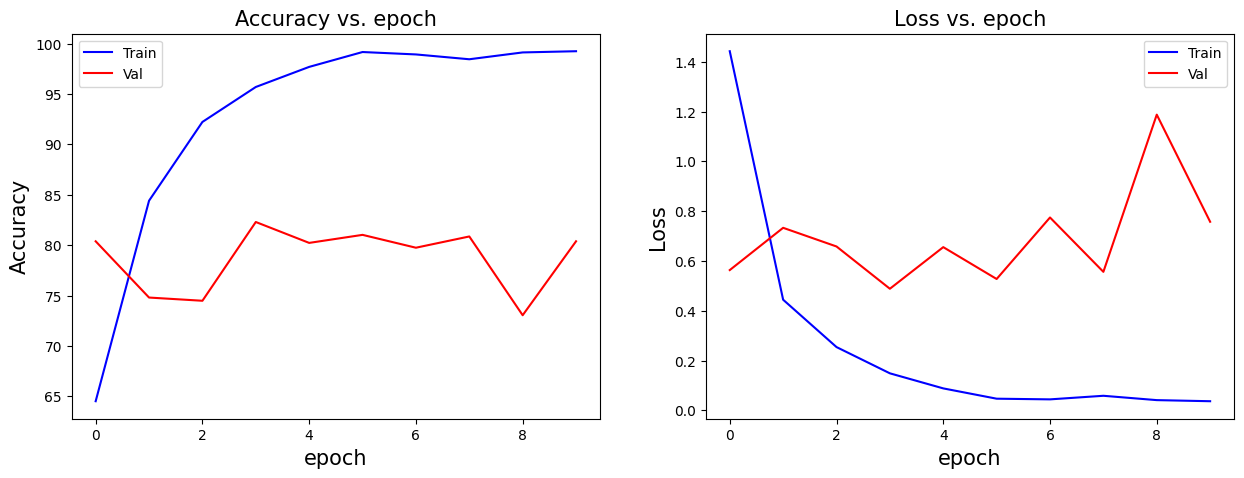

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

In [ ]:
# load model from pretrained checkpoints (optional)
model.load_weights("/tmp/checkpoint.weights.h5")

# run model prediction and obtain probabilities
y_pred = model.predict(test_ds)

# get list of predicted classes by taking argmax of the probabilities(y_pred)
predicted_categories = tf.argmax(y_pred, axis=1)

# get list of class names
class_names = test_data.class_names

# create list of all "y"s labels, by iterating over test dataset
true_categories = tf.concat([y for x, y in test_ds], axis=0)

# calculate accuracy
test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f'\nTest Accuracy: {test_acc:.2f}%\n')

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step



Test Accuracy: 75.78%




11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step


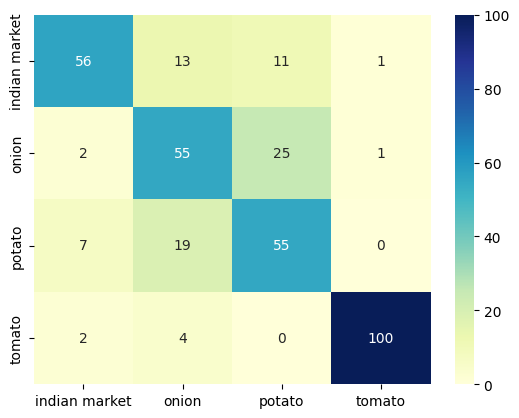

In [ ]:
def ConfusionMatrix(model, ds, label_list):
# Note: This logic doesn't work with shuffled datasets
    # run model prediction and obtain probabilities
    y_pred = model.predict(ds)
    # get list of predicted classes by taking argmax of the probabilities(y_pred)
    predicted_categories = tf.argmax(y_pred, axis=1)
    # create list of all "y"s labels, by iterating over test dataset
    true_categories = tf.concat([y for x, y in ds], axis=0)
    # generate confusion matrix and plot it
    cm = metrics.confusion_matrix(true_categories,predicted_categories) # last batch
    sns.heatmap(cm, annot=True, xticklabels=label_list, yticklabels=label_list, cmap="YlGnBu", fmt='g')
    plt.show()

ConfusionMatrix(model, test_ds, test_data.class_names)

In [ ]:
def arch_1(height=128, width=128):
    num_classes = 10
    hidden_size = 256

    model = keras.Sequential(
        name="model_cnn_1",
        layers=[
            layers.Conv2D(filters=16, kernel_size=3, padding="same", activation='relu', input_shape=(height, width, 3)),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=32, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=64, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=256, kernel_size=3, padding="same", activation='relu'),
            # layers.MaxPooling2D(),
            # layers.Flatten(),
            layers.GlobalAveragePooling2D(),
            layers.Dense(units=hidden_size, activation='relu'),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [ ]:
model = arch_1()
model.summary()

Model: "model_cnn_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 460,970 (1.76 MB)

 Trainable params: 460,970 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_fit = compile_train_v1(model, train_ds, val_ds)

Epoch 1/10

79/79 ━━━━━━━━━━━━━━━━━━━━ 69s 791ms/step - accuracy: 0.2830 - loss: 1.5571 - val_accuracy: 0.4673 - val_loss: 1.0177

Epoch 2/10

79/79 ━━━━━━━━━━━━━━━━━━━━ 84s 819ms/step - accuracy: 0.5846 - loss: 0.8810 - val_accuracy: 0.7432 - val_loss: 0.6510

Epoch 3/10

79/79 ━━━━━━━━━━━━━━━━━━━━ 67s 849ms/step - accuracy: 0.7237 - loss: 0.6626 - val_accuracy: 0.7416 - val_loss: 0.6267

Epoch 4/10

79/79 ━━━━━━━━━━━━━━━━━━━━ 65s 817ms/step - accuracy: 0.7474 - loss: 0.6139 - val_accuracy: 0.7799 - val_loss: 0.5463

Epoch 5/10

79/79 ━━━━━━━━━━━━━━━━━━━━ 86s 865ms/step - accuracy: 0.7755 - loss: 0.5514 - val_accuracy: 0.7608 - val_loss: 0.5749

Epoch 6/10

79/79 ━━━━━━━━━━━━━━━━━━━━ 81s 855ms/step - accuracy: 0.8004 - loss: 0.4898 - val_accuracy: 0.8198 - val_loss: 0.4775

Epoch 7/10

79/79 ━━━━━━━━━━━━━━━━━━━━ 61s 772ms/step - accuracy: 0.8373 - loss: 0.4409 - val_accuracy: 0.8469 - val_loss: 0.3996

Epoch 8/10

79/79 ━━━━━━━━━━━━━━━━━━━━ 85s 810ms/step - accuracy: 0.8422 - loss: 0.

In [ ]:
def plotting_acc(model_fit):

  fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
  ax = axes.ravel()

  #accuracy graph
  ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
  ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
  ax[0].set_title('Accuracy vs. epoch', fontsize=15)
  ax[0].set_ylabel('Accuracy', fontsize=15)
  ax[0].set_xlabel('epoch', fontsize=15)
  ax[0].legend()

  #loss graph
  ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
  ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
  ax[1].set_title('Loss vs. epoch', fontsize=15)
  ax[1].set_ylabel('Loss', fontsize=15)
  ax[1].set_xlabel('epoch', fontsize=15)
  ax[1].legend()

  #display the graph
  plt.show()

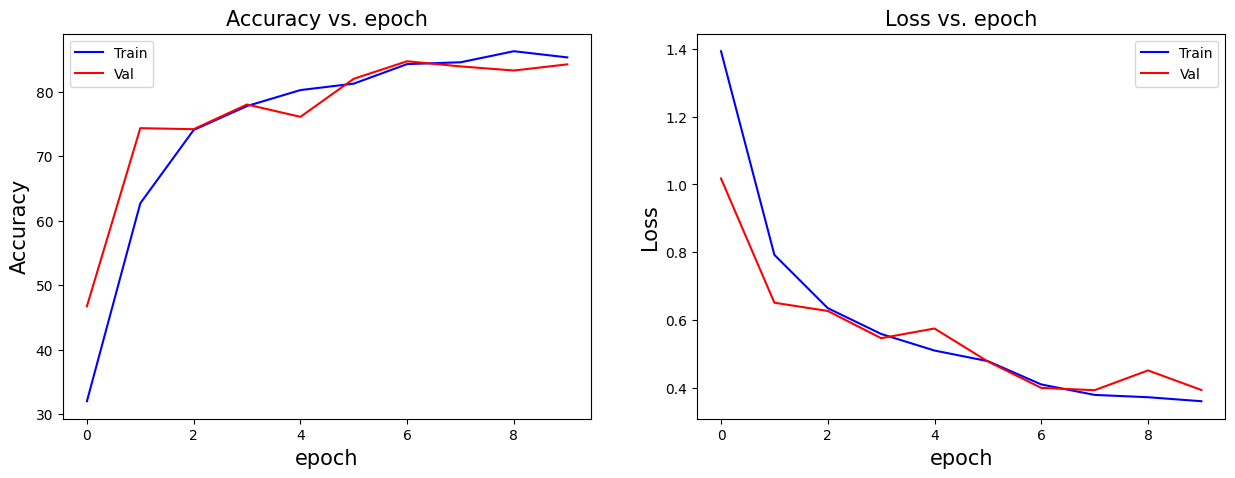

In [ ]:
plotting_acc(model_fit)

In [ ]:
def calculate_testing_accuracy(model, test_ds):
  # load model from pretrained checkpoints (optional)
  model.load_weights("/tmp/checkpoint.weights.h5")

  # run model prediction and obtain probabilities
  y_pred = model.predict(test_ds)

  # get list of predicted classes by taking argmax of the probabilities(y_pred)
  predicted_categories = tf.argmax(y_pred, axis=1)

  # get list of class names
  class_names = test_data.class_names

  # create list of all "y"s labels, by iterating over test dataset
  true_categories = tf.concat([y for x, y in test_ds], axis=0)

  # calculate accuracy
  test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
  print(f'\nTest Accuracy: {test_acc:.2f}%\n')

In [ ]:
calculate_testing_accuracy(model, test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 389ms/step



Test Accuracy: 76.92%




11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 551ms/step


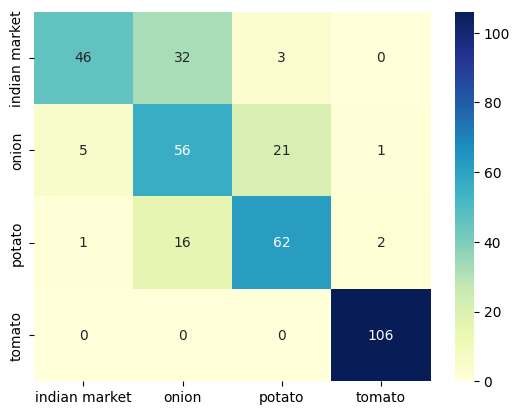

In [ ]:
ConfusionMatrix(model, test_ds, test_data.class_names)

In [ ]:
def compile_train_v2(model, train_ds, val_ds, epochs=10, ckpt_path="/tmp/checkpoint.weights.h5"):
    callbacks = [
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.3, patience=5, min_lr=0.00001
        ),
        keras.callbacks.ModelCheckpoint(ckpt_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
        keras.callbacks.EarlyStopping(
            monitor="val_loss", patience=10, min_delta=0.001, mode='min'
        )
    ]
    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=callbacks)
    return model_fit

In [ ]:
def arch_2(height=128, width=128):
    num_classes = 10
    hidden_size = 256

    model = keras.Sequential(
        name="model_cnn_2",
        layers=[
            layers.Conv2D(filters=16, kernel_size=3, padding="same", input_shape=(height, width, 3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=32, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=64, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=128, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=256, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            # layers.MaxPooling2D(),
            # layers.Flatten(),
            layers.GlobalAveragePooling2D(),
            layers.Dense(units=hidden_size),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [ ]:
model = arch_2()
model.summary()

Model: "model_cnn_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128, 128, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 463,978 (1.77 MB)

 Trainable params: 462,474 (1.76 MB)

 Non-trainable params: 1,504 (5.88 KB)

In [ ]:
model_fit = compile_train_v2(model, train_ds, val_ds,100 )

Epoch 1/100

79/79 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.8479 - loss: 0.4285 - val_accuracy: 0.8166 - val_loss: 0.6078 - learning_rate: 0.0010

Epoch 2/100

79/79 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8506 - loss: 0.3822 - val_accuracy: 0.8166 - val_loss: 0.5333 - learning_rate: 0.0010

Epoch 3/100

79/79 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.8784 - loss: 0.3416 - val_accuracy: 0.8676 - val_loss: 0.4594 - learning_rate: 0.0010

Epoch 4/100

79/79 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.8579 - loss: 0.3945 - val_accuracy: 0.8884 - val_loss: 0.3251 - learning_rate: 0.0010

Epoch 5/100

79/79 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8808 - loss: 0.3152 - val_accuracy: 0.8517 - val_loss: 0.4661 - learning_rate: 0.0010

Epoch 6/100

79/79 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.8968 - loss: 0.2708 - val_accuracy: 0.7209 - val_loss: 1.1191 - learning_rate: 0.0010

Epoch 7/100

79/79 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9086 - loss: 0

In [ ]:
calculate_testing_accuracy(model, test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 606ms/step



Test Accuracy: 89.46%




11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 353ms/step


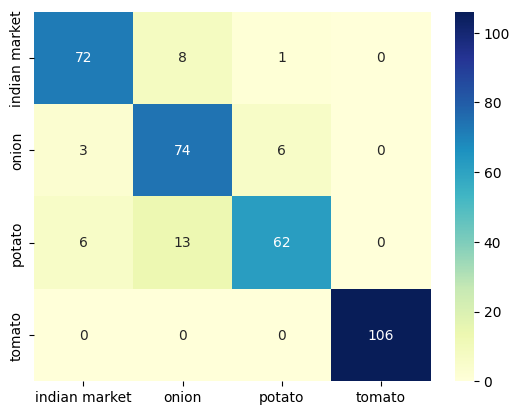

In [ ]:
ConfusionMatrix(model, test_ds, test_data.class_names)

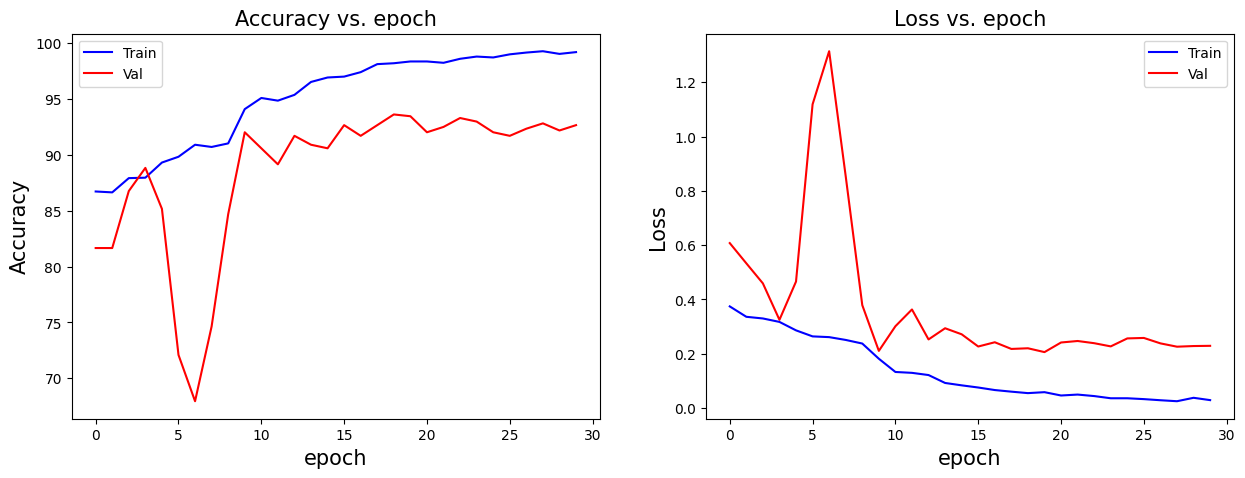

In [ ]:
  fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
  ax = axes.ravel()

  #accuracy graph
  ax[0].plot(range(0,30), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
  ax[0].plot(range(0,30), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
  ax[0].set_title('Accuracy vs. epoch', fontsize=15)
  ax[0].set_ylabel('Accuracy', fontsize=15)
  ax[0].set_xlabel('epoch', fontsize=15)
  ax[0].legend()

  #loss graph
  ax[1].plot(range(0,30), model_fit.history['loss'], label='Train', color='b')
  ax[1].plot(range(0,30), model_fit.history['val_loss'], label='Val', color='r')
  ax[1].set_title('Loss vs. epoch', fontsize=15)
  ax[1].set_ylabel('Loss', fontsize=15)
  ax[1].set_xlabel('epoch', fontsize=15)
  ax[1].legend()

  #display the graph
  plt.show()

In [ ]:
BATCH_SIZE = 128
tf.random.set_seed(10)
np.random.seed(10)
train_ds = tf.keras.utils.image_dataset_from_directory("/content/ninjacart_data/ninjacart_data/train/", validation_split = validation_split, subset = "training", seed = seed_train_validation, shuffle =True,image_size=(224, 224),batch_size=BATCH_SIZE)
val_ds   = tf.keras.utils.image_dataset_from_directory("/content/ninjacart_data/ninjacart_data/train/", validation_split = validation_split, subset = "validation", seed = seed_train_validation, shuffle =True,image_size=(224, 224),batch_size=BATCH_SIZE)
test_ds = tf.keras.utils.image_dataset_from_directory("/content/ninjacart_data/ninjacart_data/test/",shuffle =False, seed=123,image_size=(224, 224),batch_size=BATCH_SIZE)

data_preprocess = tf.keras.Sequential(
    name="data_preprocess",
    layers=[ layers.Rescaling(1.0/255),]
)

# Perform Data Processing on the train, val, test dataset
train_ds = train_ds.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_ds.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_ds.map(lambda x, y: (data_preprocess(x), y))

Found 3135 files belonging to 4 classes.

Using 2508 files for training.

Found 3135 files belonging to 4 classes.

Using 627 files for validation.

Found 351 files belonging to 4 classes.


In [ ]:
pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=[224,224, 3])
# "Get the first few blocks of pretrained model and freeze them"
#1. break this pretrained model into two halves. first half is what you will freeze, 2nd half you will keep as it is
#2. sequential api (1st half, 2nd half, flatten, dense)
pretrained_model.trainable=False
vgg16_model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
pretrained_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
import functools
top5_acc = functools.partial(tf.keras.metrics.SparseTopKCategoricalAccuracy())

vgg16_model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = vgg16_model.fit(train_ds, epochs=5,
                    validation_data=val_ds)

Epoch 1/5

20/20 ━━━━━━━━━━━━━━━━━━━━ 1711s 86s/step - accuracy: 0.5385 - loss: 1.2207 - val_accuracy: 0.8437 - val_loss: 0.3906

Epoch 2/5

20/20 ━━━━━━━━━━━━━━━━━━━━ 1805s 88s/step - accuracy: 0.8764 - loss: 0.2921 - val_accuracy: 0.8788 - val_loss: 0.2822

Epoch 3/5

20/20 ━━━━━━━━━━━━━━━━━━━━ 1718s 86s/step - accuracy: 0.9424 - loss: 0.1685 - val_accuracy: 0.9075 - val_loss: 0.2315

Epoch 4/5

20/20 ━━━━━━━━━━━━━━━━━━━━ 1691s 85s/step - accuracy: 0.9695 - loss: 0.1117 - val_accuracy: 0.9219 - val_loss: 0.2022

Epoch 5/5

20/20 ━━━━━━━━━━━━━━━━━━━━ 1702s 85s/step - accuracy: 0.9870 - loss: 0.0792 - val_accuracy: 0.9250 - val_loss: 0.1924


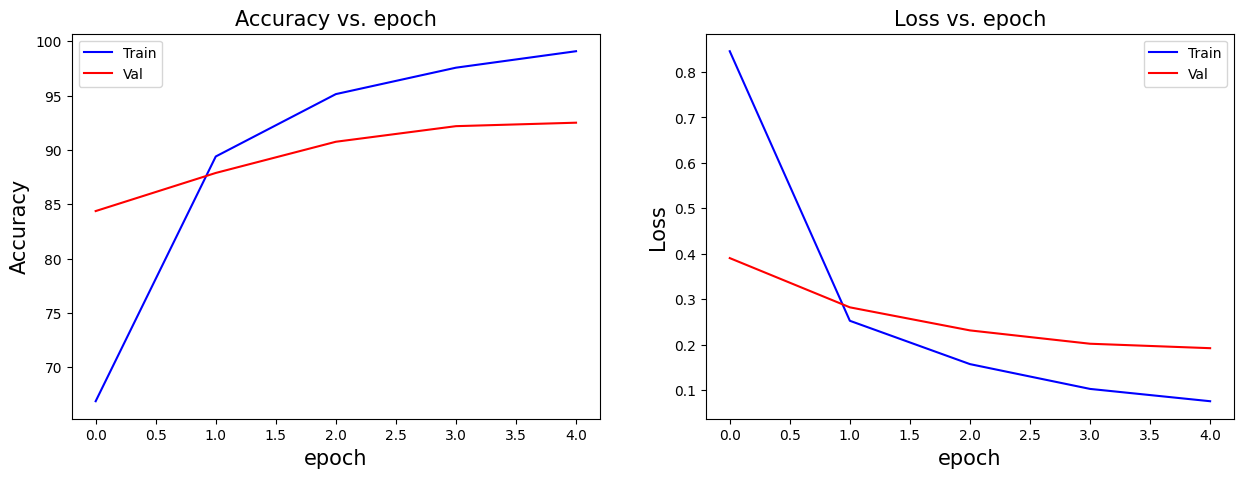

In [ ]:
plotting_acc(history)

In [ ]:
calculate_testing_accuracy(vgg16_model, test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step



Test Accuracy: 90.03%




In [ ]:
vgg16_model_pretrained = vgg16_model.save("vgg16_model_pretrained.keras")

In [ ]:
def plot_image(pred_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                100*np.max(pred_array),
                                ),
                                color=color)

3/3 ━━━━━━━━━━━━━━━━━━━━ 203s 64s/step


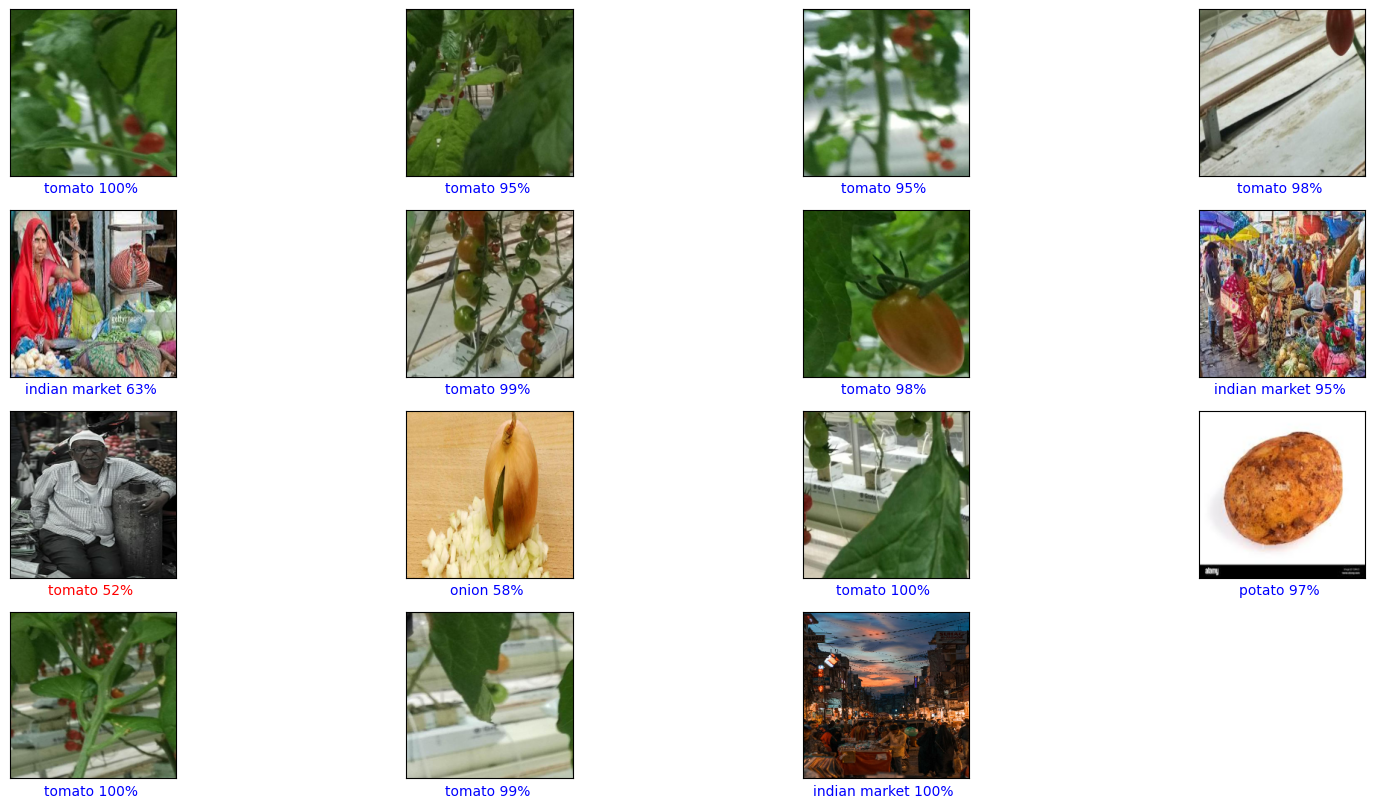

In [ ]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)
images = tf.concat([x for x, y in test_ds], axis=0)
y_pred = vgg16_model.predict(test_ds)
class_names = test_data.class_names

# Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
indices = random.sample(range(len(images)), 15)
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols, 2*num_rows))
for i,index in enumerate(indices):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(y_pred[index], true_categories[index], images[index])

plt.tight_layout()
plt.show()

In [ ]:
pretrained_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=[224,224, 3])
# "Get the first few blocks of pretrained model and freeze them"
#1. break this pretrained model into two halves. first half is what you will freeze, 2nd half you will keep as it is
#2. sequential api (1st half, 2nd half, flatten, dense)
pretrained_model.trainable=False
resnet_model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
resnet_model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = resnet_model.fit(train_ds, epochs=5,
                    validation_data=val_ds)

Epoch 1/5

20/20 ━━━━━━━━━━━━━━━━━━━━ 589s 29s/step - accuracy: 0.7489 - loss: 1.8764 - val_accuracy: 0.9362 - val_loss: 0.9783

Epoch 2/5

20/20 ━━━━━━━━━━━━━━━━━━━━ 613s 29s/step - accuracy: 0.9765 - loss: 0.1406 - val_accuracy: 0.9426 - val_loss: 0.7345

Epoch 3/5

20/20 ━━━━━━━━━━━━━━━━━━━━ 623s 29s/step - accuracy: 0.9941 - loss: 0.0281 - val_accuracy: 0.9490 - val_loss: 0.6081

Epoch 4/5

20/20 ━━━━━━━━━━━━━━━━━━━━ 572s 29s/step - accuracy: 0.9990 - loss: 0.0033 - val_accuracy: 0.9506 - val_loss: 0.6047

Epoch 5/5

20/20 ━━━━━━━━━━━━━━━━━━━━ 589s 27s/step - accuracy: 0.9996 - loss: 0.0010 - val_accuracy: 0.9601 - val_loss: 0.5819


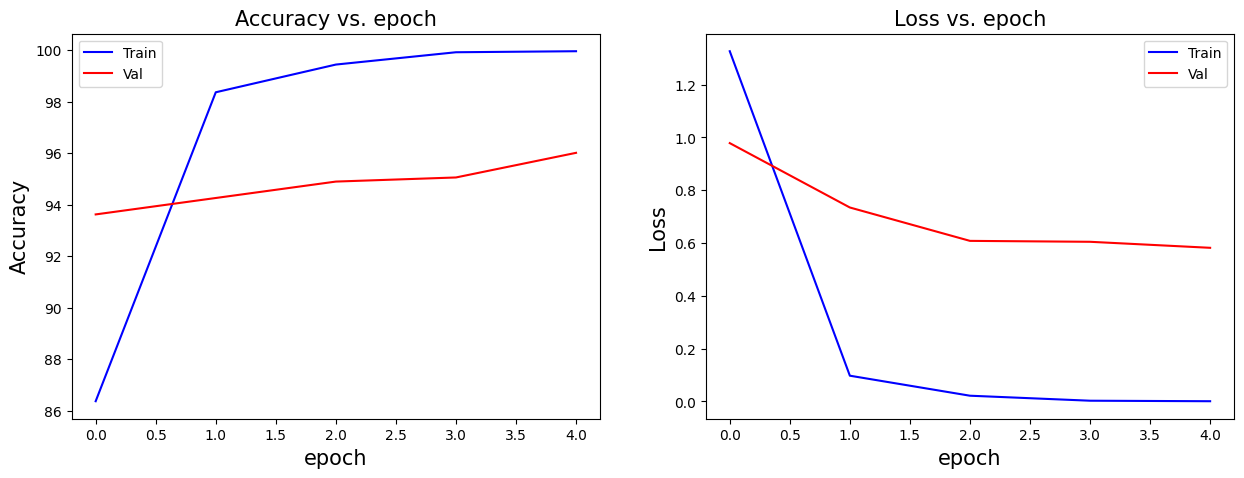

In [ ]:
plotting_acc(history)

2/3 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 64s 19s/step


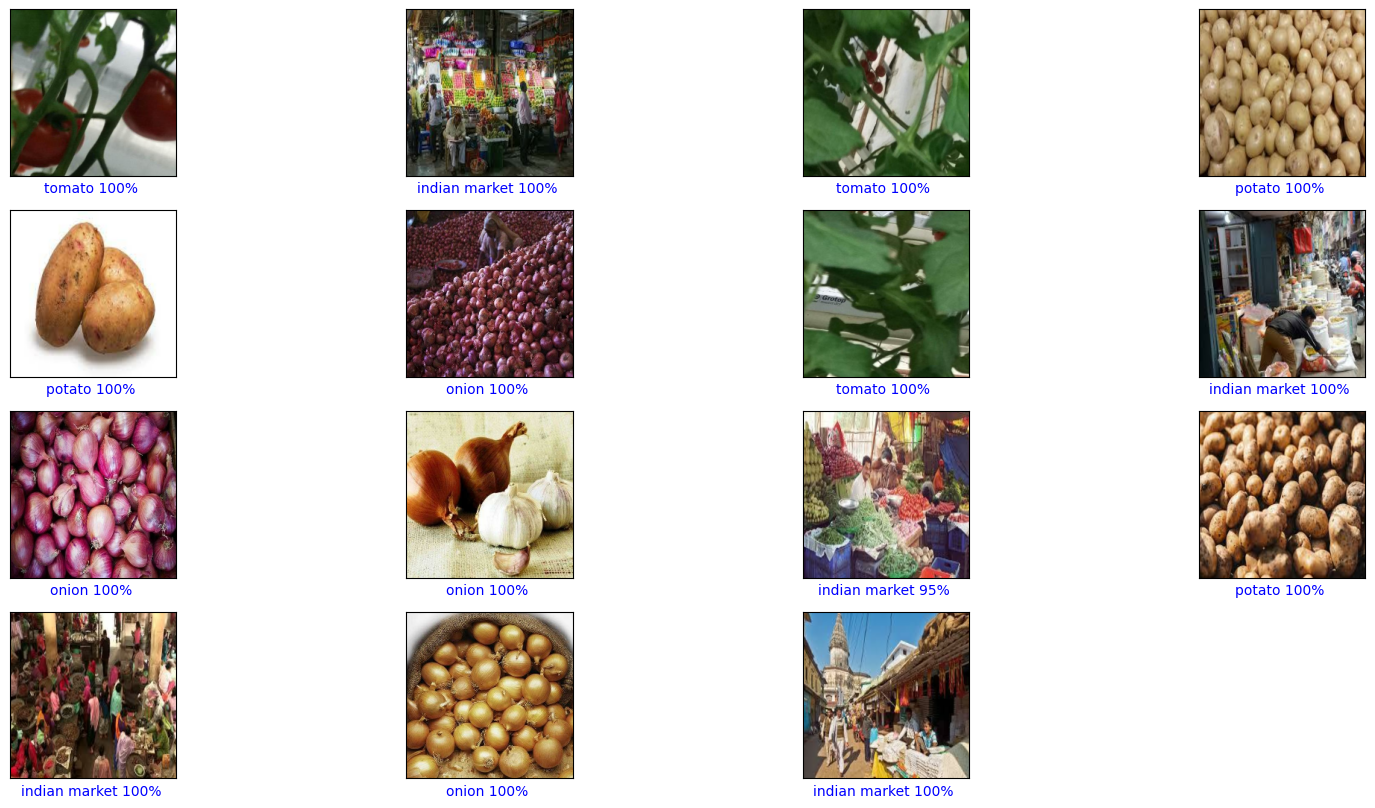

In [ ]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)
images = tf.concat([x for x, y in test_ds], axis=0)
y_pred = resnet_model.predict(test_ds)
class_names = test_data.class_names

# Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
indices = random.sample(range(len(images)), 15)
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols, 2*num_rows))
for i,index in enumerate(indices):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(y_pred[index], true_categories[index], images[index])

plt.tight_layout()
plt.show()

In [ ]:
y_pred = resnet_model.predict(test_ds)

  # get list of predicted classes by taking argmax of the probabilities(y_pred)
predicted_categories = tf.argmax(y_pred, axis=1)

  # get list of class names
class_names = test_data.class_names

  # create list of all "y"s labels, by iterating over test dataset
true_categories = tf.concat([y for x, y in test_ds], axis=0)

  # calculate accuracy
test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f'\nTest Accuracy: {test_acc:.2f}%\n')

3/3 ━━━━━━━━━━━━━━━━━━━━ 64s 19s/step



Test Accuracy: 87.46%




#Insights and Recommendations for the Computer Vision Project

This project focuses on building image classification models to distinguish between different types of vegetables using TensorFlow/Keras. The goal is to classify four categories: tomato, potato, onion, and Indian market.

Key Components:

1.	**Dataset Loading and Preprocessing:**

•	The dataset is downloaded from a Google Drive link and unzipped.

•	tf.keras.utils.image_dataset_from_directory is used to load the training and test datasets, with images being categorized using directory structure.

•	Data is split into training, validation, and test sets.

**Recommendations**:

•	You could apply data augmentation techniques (e.g., rotation, zoom, horizontal flip) to improve the model’s robustness, especially since the dataset is relatively small (3135 training images and 351 test images).

•	For better generalization, consider techniques like Stratified Split for training and validation to ensure even class distribution.

2.	**Data Preprocessing**:

•	Resizing images to 128x128 and normalizing pixel values to [0, 1] using layers.Rescaling(1.0/255).
**Recommendations**:

•	Use larger image sizes (like 224x224) to better leverage pre-trained models (VGG16, ResNet), as they are typically trained on larger images.

•	Include Image Augmentation during preprocessing to improve model generalization (for example, random flips, rotations).

3.	**Model Architecture**:

•	The first model is a simple Convolutional Neural Network (CNN) with one Conv2D layer followed by MaxPooling, Flatten, and Dense layers.

•	Another architecture uses multiple Conv2D layers and a GlobalAveragePooling layer to reduce the feature maps before Dense layers.

**Recommendations**:

•	For simple models, use Batch Normalization after each Conv2D layer to improve convergence and stability during training.

•	You could use Dropout layers to reduce overfitting in such deep models, especially with a small dataset.

•	Consider increasing the number of filters in Conv2D layers as the network depth increases (e.g., 32, 64, 128 filters), which allows the model to capture more complex patterns.

4.	**Training and Optimization**:

•	The model is compiled using the Adam optimizer with sparse categorical cross-entropy loss.

•	Early stopping and ModelCheckpoint callbacks are used to save the best model and avoid overfitting.

**Recommendations**:

•	Use ReduceLROnPlateau to dynamically lower the learning rate when the validation loss plateaus, helping the model converge more effectively.

•	Explore different optimizers like SGD with momentum for more fine-tuned gradient updates.

5.	**Pre-trained Models**:

•	The project uses VGG16 and ResNet50V2 pre-trained on ImageNet, with the initial layers frozen and a few additional layers added on top.

•	Both pre-trained models perform well, achieving over 90% accuracy on the test set.

**Recommendations**:

•	You can try fine-tuning by unfreezing some of the top layers of the pre-trained model after training for a few epochs. This can help in adapting the learned features more closely to your dataset.

•	Also, consider using EfficientNet, which has shown better accuracy with fewer parameters than traditional architectures like VGG or ResNet.

6.	**Performance Metrics**:

•	Test accuracy is calculated (around 90%), and confusion matrices are plotted to visualize performance across different categories.

**Recommendations**:

•	You should include additional performance metrics such as precision, recall, and F1-score per class. These metrics are especially important when dealing with class imbalances, which may exist in your dataset.

•	Confusion matrix analysis can help identify classes that are being confused. Applying class weighting in the loss function can help if certain classes are under-represented.

7.	**Visualizations**:

•	The project includes plots for accuracy and loss per epoch, as well as confusion matrices.

•	Additionally, a visualization of random image samples with their predicted and true labels is provided.

**Recommendations**:
•	You can add Grad-CAM visualizations to see where the model is focusing on the image during predictions. This is particularly useful for debugging and understanding the model’s behavior.

#Summary of Recommendations:

•	Data Augmentation: Incorporate techniques like random rotation, zoom, and flips to improve the model’s ability to generalize.

•	Fine-tuning Pre-trained Models: Unfreeze a few more layers of the pre-trained models after the initial training for fine-tuning.

•	Hyperparameter Tuning: Experiment with different learning rates, batch sizes, and optimizers (e.g., SGD, Adam with decay).

•	Batch Normalization and Dropout: Add Batch Normalization and Dropout layers to reduce overfitting and improve stability.

•	Additional Metrics: Evaluate models with precision, recall, and F1-score, not just accuracy, to better understand class-wise performance.
